# DAT 510: Assignment 1

Erik Martin 250660

In [1]:
%pip install numpy -q
%pip install ipytest -q
%pip install pandas -q
%pip install matplotlib -q


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import ipytest

ipytest.autoconfig()

# Task 1

In [3]:
def caesar(text: str, shift: int) -> str:
    """Substitute the text using the Caesar cipher.

    The caesar cipher is a substitution cipher where the letters are shifted in 
    a fixed direction with an x amount of positions. When you create a shifted
    vocabulary, you can easilly map the letters and get a "cipher" text. The
    Caesar cipher is very old so the security very low, but to the untrained eye
    it can be hard to decipher manually 
    [wikipedia](https://en.wikipedia.org/wiki/Caesar_cipher#example)

    Args:
        text: The text to substitute.
        shift: The key to use for the substitution.

    Returns:
        The substituted text.
    """
    # Create a dictionary of the alphabet with the Caesar cipher key
    alphabet = {chr(i + 65): chr((i + shift) % 26 + 65) for i in range(26)}
    return "".join([alphabet[c] for c in text])

In [4]:
def columnar(text: str, key: int) -> str:
    """Transpose the text using the transposition cipher.

    A transposition cipher is an encryption method that relies on rearranging
    the letters in the plaintext to produce the ciphertext. Row-column
    transposition is a simple transposition cipher that enters the plaintext
    into a matrix row by row, then reads the matrix column by column in a
    specific order. The order is dependent on the key. Meaning that the amount
    of columns has to be equal to the number of digits in the key. The key
    should also be a permutation of the numbers 1 - n, in a randomised order. If
    the length of the text is not divisible by the key, the text should be
    padded with a filler character, such as "X".
    [wikipedia](https://en.wikipedia.org/wiki/Transposition_cipher#Columnar_transposition)

    To simplify the implementation in code, the matrix is transposed and the the
    matrix is read row by row again. This is equivalent to reading the matrix
    column by column.

    Args:
        text: The text to transpose.
        key: The key

    Returns:
        The transposed text.
    """
    kl = [int(i) for i in str(key)]
    cols = len(kl)
    rows = math.ceil(len(text) / cols)

    # Pad with "X" until the text is divisible by the key length
    text = text.ljust(rows * cols, "X")

    # Create a matrix from the text
    m = np.array(list(text)).reshape(rows, cols).T

    # Read the matrix in the order specified by the key
    return "".join(["".join(m[kl.index(i)]) for i in range(1, cols + 1)])

In [5]:
def encrypt(text: str, key: int, sub_key: int) -> str:
    """Encrypt the text using the Caesar and transposition ciphers.

    Encrypts a plaintext in the order of:
    1. Substitution using the Caesar cipher.
    2. Transposition using the columnar transposition cipher.

    This order helps eliminate predictable patterns in the text which frequency 
    analysis reveal by checking for letter frequencies, and common letter
    combinations (digraphs, trigraphs, etc.). `E` is the most common letter in
    the English alphabet, `TH` the most common digraph, and `THE` the most 
    common trigraph. By looking for these patterns, it is possible to deduce the
    key. 

    Args:
        text: The text to encrypt.
        key: The key to use for the encryption.
        sub_key: The key to use for the substitution.

    Returns:
        The encrypted text.
    """
    text = "".join(text).replace(" ", "").upper()
    return columnar(caesar(text, sub_key), key)

In [6]:
def decrypt(text: str, key: int, sub_key) -> str:
    """Decrypt the text using the transposition and Caesar ciphers.

    Decrypt the text by using the encryption process in reverse. First it reads
    the text into a matrix, which now has the dimension of  `n x m` instead of 
    `m x n`. Aka, if the key was 1234 and the text was "HELLOWORLD", the matrix
    during encryption would be: `4 x 2 -> 2 x 4`, but now it would be 
    `2 x 4 -> 4 x 2`. The is then again transposed and reorganized in the order
    of the key. Then the text is decrypted using the inverse Caesar cipher key.

    Args:
        text: The text to decrypt
        key: The key for encrypting

    Returns:
        The decrypted text.
    """
    kl = [int(i) for i in str(key)]
    # Matrix columns is the length of the key
    cols = len(kl)
    # Matrix rows is the length of the text / number of cols rounded up.
    rows = math.ceil(len(text) / cols)

    tmp_m = [""] * cols

    # Create a matrix from the text
    m = np.array(list(text)).reshape(cols, rows)

    # Read the matrix in the order specified by the key and push it to the temporary matrix
    for i, row in enumerate(m):
        k = kl.index(i + 1)
        tmp_m[k] = [str(c) for c in row]

    # Convert the temporary matrix to a np matrix and transpose
    m = np.array(tmp_m).T

    cipher = "".join(["".join(row) for row in m])

    # Decrypt the text using the inverse Caesar cipher key
    sub_key = 26 - sub_key
    return caesar(cipher, sub_key)

In [7]:
plaintext = "Erik Martin Security and Vulnerability in Networks"
plaintext = plaintext.replace(" ", "").upper()
key = 31425
sub_key = 5
substituted = caesar(plaintext, sub_key)
print(substituted)
transposed = columnar(substituted, key)
print(transposed)

print(caesar(columnar(plaintext, key), sub_key))

JWNPRFWYNSXJHZWNYDFSIAZQSJWFGNQNYDNSSJYBTWPX
WWJYAWNSWPNZFQGDYXJFXNIJQSTNYHDZFYJPRSWSSNNBX
WWJYAWNSWPNZFQGDYXJFXNIJQSTNYHDZFYJPRSWSSNNBC


In [8]:
decrypt(transposed, key, sub_key)

'ERIKMARTINSECURITYANDVULNERABILITYINNETWORKSS'

In [9]:
def test_caesar():
    assert caesar("HELLO", 5) == "MJQQT"
    assert caesar("HELLO", 2) == "JGNNQ"
    assert caesar("HELLO", 1) == "IFMMP"


def test_columnar():
    assert columnar("HELLO", 213) == "EOHLLX"
    assert columnar("HELLO", 123) == "HLEOLX"


def test_decrypt():
    string = "THISISATESTSTRING"
    key = 2134
    sub_key = 4
    assert (
        decrypt(encrypt(string, key, sub_key), key, sub_key)
        == "THISISATESTSTRINGTTT"
    )
    key = 3214
    sub_key = 14
    assert (
        decrypt(encrypt(string, key, sub_key), key, sub_key)
        == "THISISATESTSTRINGJJJ"
    )


ipytest.run("-vv")

======================================= test session starts ========================================
platform linux -- Python 3.11.9, pytest-8.3.2, pluggy-1.5.0 -- /home/emrds/.conda/envs/net-sec/bin/python
cachedir: .pytest_cache
rootdir: /home/emrds/school/dat510-networksecurity/assignment1
plugins: typeguard-4.3.0
collecting ... collected 3 items

t_be741ac3455f41d28758eadf96e1f205.py::test_caesar PASSED                                    [ 33%]
t_be741ac3455f41d28758eadf96e1f205.py::test_columnar PASSED                                  [ 66%]
t_be741ac3455f41d28758eadf96e1f205.py::test_decrypt PASSED                                   [100%]

======================================== 3 passed in 0.01s =========================================


<ExitCode.OK: 0>

In [10]:
import time
from typing import Callable


def analyze_avalanche_effect(
    encryption_method: Callable, original: str, changed: str, key: int = None, sub_key: int = None, iv: bytes | None = None, keys=None, start: float = time.time(), 
) -> tuple[int, float, str, str]:
    """Analyze the avalanche effect of two strings.
    
    Analyze the avalanche effect of two strings by comparing the two encrypted
    strings. Both with the same plaintext, but with some predefined differences.
    To idea to convert the string to binary was taken from 
    [start overflow](https://stackoverflow.com/a/18815890). It idea is to
    convert the string to a bytearray and then format it to binary.

    Args:
        encryption_method: The function to encrypt with.
        original: The original cipher text.
        changed: The changed cipher text.
        key: The transposition key.
        sub_key: The substitution key.
        iv: The initialization vector.
        keys: The keys for the encryption method.

    Returns:
        (avalance_effect, time, original_cipher, changed_cipher)
    """
    # Give different parameters to the different encryption methods depending on
    # Parameter
    if iv:
        original = encryption_method(original, key, sub_key, iv)
        changed = encryption_method(changed, key, sub_key, iv)
        str1 = bytearray(original, "utf-8")
        str2 = bytearray(changed, "utf-8")
    elif keys:
        original = encryption_method(original, keys)
        changed = encryption_method(changed, keys)
        str1 = bytearray(original)
        str2 = bytearray(changed)
    else:
        original = encryption_method(original, key, sub_key)
        changed = encryption_method(changed, key, sub_key)
        str1 = bytearray(original, "utf-8")
        str2 = bytearray(changed, "utf-8")

    # Compare each of the characters/bytes and count the amount of differing ones.
    changes = sum(format(b1, "b") != format(b2, "b") for b1, b2 in zip(str1, str2))
    
    return (changes / len(str1)) * 100, (time.time() - start) * 1000, original, changed

In [11]:
original = plaintext[:]
changed = "R" + plaintext[1:]
print(original)
print(changed)

# Since only one letter was changed the avalanch effect (1/len(plaintext) * 100
print(analyze_avalanche_effect(encrypt, original, changed, key, sub_key))

ERIKMARTINSECURITYANDVULNERABILITYINNETWORKS
RRIKMARTINSECURITYANDVULNERABILITYINNETWORKS
(2.2222222222222223, 23.708105087280273, 'WWJYAWNSWPNZFQGDYXJFXNIJQSTNYHDZFYJPRSWSSNNBX', 'WWJYAWNSWPNZFQGDYXWFXNIJQSTNYHDZFYJPRSWSSNNBX')


In [12]:
from typing import Callable
import pandas as pd


def repeated_encrypt(
    encryption_method: Callable,
    text: str,
    key: int,
    sub_key: int,
    rounds: int,
    swap: dict[int, str] = {2: "X"},
) -> pd.DataFrame:
    """Repeatedly encrypt the text using the Caesar and transposition ciphers.

    Args:
        encryption_method: The function to encrypt with.
        text: The plaintext.
        key: The transposition key.
        sub_key: The Caesar key.
        rounds: Number of rounds to encrypt.
        swap: A dictionary with index as key and the character to swap to as value.

def feistel_encrypt(plaintext: str, keys: list[str]) -> bytes:
    """
    """
    if isinstance(plaintext, bytes):
        plaintext = plaintext.decode("utf-8")
    plaintext = plaintext.replace(" ", "").upper()
    return feistel(plaintext, keys)

    Returns:
        Dataframe with the avalanche effect and time for each round.
    """
    # Initially create two copies of the plaintext where one letter is changed
    original = plaintext
    changed = text
    start = time.time()


    # Change the desired values in the plaintext before encrypting
    for k, v in swap.items():
        changed = changed[:k] + v + changed[k + 1 :]
    
    original = encryption_method(original, key, sub_key)
    changed = encryption_method(changed, key, sub_key)
    df = pd.DataFrame(columns=["Avalanche Effect", "Time"])

    for i in range(rounds):
        effect, t, original, changed = analyze_avalanche_effect(encryption_method, original, changed, key, sub_key)
        df.loc[i] = [effect, t]
    return df

In [13]:
from matplotlib import pyplot as plt

# Create a list of the avalanche effect and time for each round
df_1_bitchange = repeated_encrypt(encrypt, plaintext, key, sub_key, 16, {2: "X"})
df_2_bitchange = repeated_encrypt(encrypt, plaintext, key, sub_key, 16, {2: "X", 8: "G"})
df_3_bitchange = repeated_encrypt(encrypt, plaintext, key, sub_key, 16, {2: "X", 8: "G", 12: "Y"})
df_4_bitchange = repeated_encrypt(encrypt, plaintext, key, sub_key, 16, {2: "X", 8: "G", 12: "Y", 15: "Z"})


def create_plot(dfs: list[tuple[pd.DataFrame, int]]):

    # Plot the avalanche effect
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ns = [dfs[i][1] for i in range(len(dfs))]
    for df, n in dfs:
        ax[0].plot(df["Avalanche Effect"])
        ax[0].set_xlabel("Rounds")
        ax[0].set_ylabel("Avalanche Effect (%)")
        ax[0].set_title(f"Avalanche Effect Over Time for when bits are changed")

        # Plot the time
        ax[1].plot(df["Time"])
        ax[1].set_xlabel("Rounds")
        ax[1].set_ylabel("Time (ms)")
        ax[1].set_title(
            f"Calculation Time for Avalanche Effect Analysis when bits are changed"
        )
    ax[0].legend([f"{n} bits changed" for n in ns])
    ax[1].legend([f"{n} bits changed" for n in ns])

    plt.show()

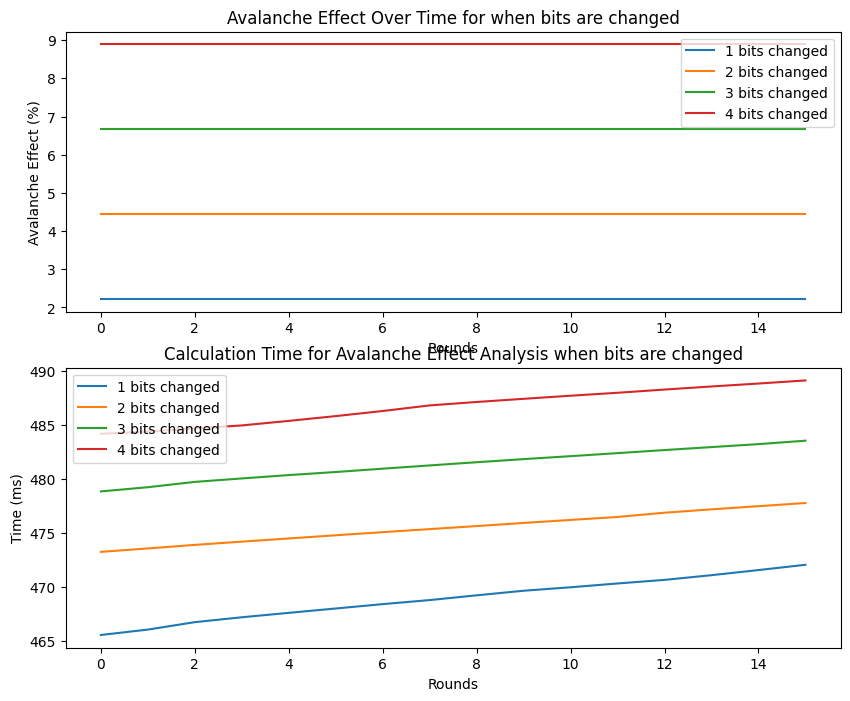

In [14]:
dfs = [
    (df_1_bitchange, 1),
    (df_2_bitchange, 2),
    (df_3_bitchange, 3),
    (df_4_bitchange, 4),
]
# Even when multiple bits are changed. The 
create_plot(dfs)

In [15]:
def feistel(cipher: str, keys: bytearray, rounds: int = 16) -> bytes:
    """Encrypt the text using the Feistel cipher.

    The Feistel cipher uses mulitple keys for encryption. It splits the text into two
    and one part with the key and the other with the result of the first xor operation.
    [feistel structure](https://en.wikipedia.org/wiki/Feistel_cipher#Design)
    
    Args:
        cipher: The text to encrypt.
        keys: The keys to use for the encryption.
        rounds: The number of rounds to encrypt.

    Returns:
        The encrypted text.
    """
    def xor(a: bytes, b: bytes) -> bytes:
        return bytes([a ^ b for a, b in zip(a, b)])
    
    left = bytearray(cipher[:len(cipher) // 2], "utf-8")
    right = bytearray(cipher[len(cipher) // 2:], "utf-8")

    for i in range(rounds):
        key = keys[i % len(keys)]
        tmp_left = right
        round_res = xor(left, key)
        right = xor(round_res, right)
        left = tmp_left
    return left + right

In [16]:
import random as rand

num_rounds = 16
keys = [bytearray([rand.randint(65, 90) for _ in range(len(plaintext) // 2)]) for _ in range(num_rounds)]
print(keys)
cipher = feistel(plaintext, keys)
print(cipher)

[bytearray(b'IQKLDCCHSDUILCQRWXUBOC'), bytearray(b'DEYIZYPVQMMPQHWFNGRLSO'), bytearray(b'CQEUWJNUDOCOYBNJAWLHBX'), bytearray(b'GRYESGKQYACOQOCZEALJKH'), bytearray(b'HYRGPGCGYORSESHKHLCRSE'), bytearray(b'CAGOMDVCJYZZSCBMXXLWWY'), bytearray(b'RBILZWCMLLLCQIJFZPGIWT'), bytearray(b'LVUSCWDGCAENPWHKXBLDWY'), bytearray(b'GSBSAVJENCKNDIRBJVPCDV'), bytearray(b'MSAYSVMTUYCEURJELSXMOM'), bytearray(b'DNJQHFIJUBAEGZRFXEJZOP'), bytearray(b'XIPIIZSATGVIARBKFZIGLN'), bytearray(b'CDZHXJGXKESWHCPCTHHMCZ'), bytearray(b'VIHLGBPIIRXMQFZQZFTZVM'), bytearray(b'ZOUXTILSUKNOMGHZICOTAD'), bytearray(b'XXVPIVWVJRGTJXXVEHVUMK')]
b'BDW]RGA]ZC]AYCE@T]ZGY@_UTRVRKRVY@BSJRFIT@GA['


In [17]:
ori = encrypt(plaintext[:], key, sub_key)
cha = encrypt("R" + plaintext[1:], key, sub_key)

# Testing the avalanche effect for the Feistel cipher
for i in range(16):
    ae, t, ori, cha = analyze_avalanche_effect(feistel, ori, cha, keys=keys)
    ori = ori.decode("utf-8")
    cha = cha.decode("utf-8")
    print(ae)

2.272727272727273
4.545454545454546
2.272727272727273
2.272727272727273
4.545454545454546
2.272727272727273
2.272727272727273
4.545454545454546
2.272727272727273
2.272727272727273
4.545454545454546
2.272727272727273
2.272727272727273
4.545454545454546
2.272727272727273
2.272727272727273


In [18]:


def get_iv(block_size: int) -> bytes:
    """Creates the Initial Vector to use in the first round of block xor-ing.
    
    Create a random string  of bytes of the given blocksize

    Args:
        block_size: The size of the block that should be creates.
    
    Returns:
        iv of bytes
    """
    return "".join(rand.choices([chr(rand.randint(65, 90)) for _ in range(block_size)], k=block_size))

def cbc(cipher: str, iv: bytes, key, sub_key) -> bytes:
    """Encrypts the cipher with a cipher block chaining mode.

    Args:
        cipher: The cipher text.
        iv: The initial vector.

    Returns:
        bytes of the cipher text
    """
    block_size = len(iv)
    # Split into blocks of block_size
    blocks = [cipher[i:i+block_size] for i in range(0, len(cipher), block_size)]

    cbc_cipher = ""
    # XOR each character with eachother in each block and use the previous block
    # to xor with the next.
    for block in blocks:
        cipher_block = [chr(((ord(a) - 65) ^ (ord(b) - 65)) % 26 + 65) for a, b in zip(block, iv)]
        cipher_block = encrypt(cipher_block, key, sub_key)
        cbc_cipher += cipher_block
        iv = cipher_block
        
    return cbc_cipher

def cbc_encrypt(plaintext: str, key: int, sub_key: int, iv: str) -> bytes:
    """Applies the cbc encryption mode after the caesar + columnar transposition.

    CBC mode is a block cipher mode that works by splitting the plaintext into
    blocks and xor-ing each block with the previous block. The first block is
    xor-ed with the initial vector, which is a random string of bytes.
    [CBC mode](https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation#Cipher_block_chaining_(CBC))
    
    Args:
        plaintext: The text to encrypt.
        key: The key for the transposition.
        sub_key: The key for the ceasar cipher.
        iv: The initial vector for the cbc encryption.
        
    Returns:
        bytes of the encrypted text.
    """
    cipher = encrypt(plaintext, key, sub_key)
    cbc_cipher = cbc(cipher, iv, key, sub_key)
    return cbc_cipher


block_size = 5
iv = get_iv(block_size)

print("\navalanche effect:")
# Even with the CBC mode, the avalanch effect is still low.
avalanche_effect = analyze_avalanche_effect(cbc_encrypt, plaintext[:], "R" + plaintext[1:], key, sub_key, iv)
print(avalanche_effect)


res = []
for bs in [4, 8, 10, 12, 16]:
    iv = get_iv(bs)
    res.append((bs, *analyze_avalanche_effect(cbc_encrypt, plaintext[:], "R" + plaintext[1:], key, sub_key, iv)))

# Trying CBC with different block sizes
print("CBC with different block_sizes")

for bs, avalanche_effect, execution_time, original, changed in res:
    print(
f"""
Block size: {bs}
Avalanche Effect: {avalanche_effect:2f}
Execution time: {execution_time}
Original: {original}
.Changed: {changed}
"""
    )

# We can see that the avalanch effect diminished with the block size




avalanche effect:
(13.333333333333334, 771.5861797332764, 'FTYKBJHYPTJKJIAXGPJKQFFMFBZHNHFAHHTWWPAGGGJHW', 'FTYKBJHYPTJKJIAXJPJKJFFMFBZGNHFAHITWJPAGJGJHW')
CBC with different block_sizes

Block size: 4
Avalanche Effect: 13.333333
Execution time: 771.9597816467285
Original: MZGJXUGRQXOOHHXJJQGXJIWEXKSJJXFJFFXTHILXKJBGXGZGCXZIZQXXXTXX
.Changed: MZGJXUGRQXOOHHXJJQGXJIWLXKHJJXAJFFXTHDLXKJBPXGIGCXKIZQXXXIXX


Block size: 8
Avalanche Effect: 7.272727
Execution time: 772.1447944641113
Original: EHKXMKMHDXNPTXXFMJOXDJXXANFFFXGLFXYPJHDXYKDXIIRAOXMBPTK
.Changed: EHKXMKMHDXNPTXXFMJOXDJXXANKFFXGOFXYPJHDXBKDXIIRAOXMBYTK


Block size: 10
Avalanche Effect: 6.666667
Execution time: 772.3026275634766
Original: LUGAALEHVISHVHLNIVLSPGTYKKIDGAKEFVRKBWIXOZDNL
.Changed: LUGAALEHVISHVILNIVLSPGGYKKIDGAKEFVRKIWIXOZDNL


Block size: 12
Avalanche Effect: 5.454545
Execution time: 772.4485397338867
Original: XOQBHXHXGVJXJDXJTJHWXXFGBXXKDXGZDPIXEVJFHXTEXQOIJCFAZFX
.Changed: XOQBHXHXGVJXJDXJWJHWXXFGBXXKDXJZDPIXEVJF

Text(0.5, 1.0, 'Avalanche Effect for different block sizes')

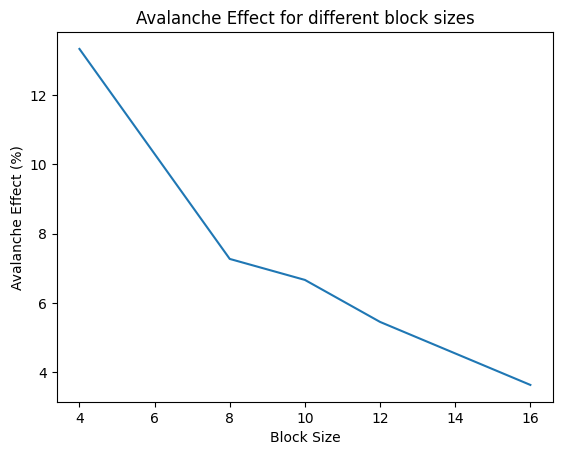

In [19]:

plt.plot([r[0] for r in res], [r[1] for r in res])
plt.xlabel("Block Size")
plt.ylabel("Avalanche Effect (%)")
plt.title("Avalanche Effect for different block sizes")